Example 4: Naive Bayes

In this page we will look at how to use the Naive Bayes algorithm to perform classification.

In [1]:
# loading numpy for data processing
import numpy as np
# Loading matplotlib for plotting graphs
import matplotlib.pyplot as plt
# Loading pandas for loading dataset into dataframe
import pandas as pd
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Loading datasets for iris dataset
from sklearn import datasets
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

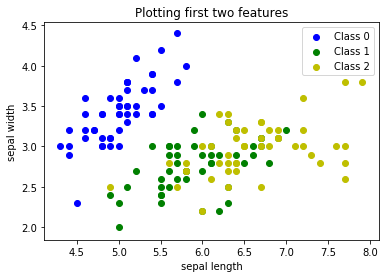

In [7]:
# Loading iris dataset
iris = datasets.load_iris()

# Considering the first two features
X = iris.data[:, :2]
y = iris.target

# Plotting the data
plt.title('Plotting first two features')
plt.scatter(X[0:49,0], X[0:49,1], color = 'b', label = 'Class 0')
plt.scatter(X[50:99,0], X[50:99,1], color = 'g', label = 'Class 1')
plt.scatter(X[100:149,0], X[100:149,1], color = 'y', label = 'Class 2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [8]:
# Splitting the data into training and validation sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# Building different naive Bayes models
titles = ('BernoulliNB','MultinomialNB','GaussianNB')
def build_model():
    models = (BernoulliNB(),MultinomialNB(),GaussianNB())
    models = (clf.fit(X_train, y_train) for clf in models)
    return models

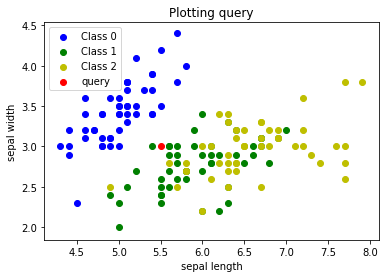

In [9]:
#Plotting a query point
query = [ 5.5, 3]

plt.title('Plotting query')
plt.scatter(X[0:49,0], X[0:49,1], color = 'b', label = 'Class 0')
plt.scatter(X[50:99,0], X[50:99,1], color = 'g', label = 'Class 1')
plt.scatter(X[100:149,0], X[100:149,1], color = 'y', label = 'Class 2')
plt.scatter( query[ 0 ], query[ 1 ], color = 'r', label = 'query')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [10]:
#Using trained model to predict class label
y_preds = [clf_pred.predict([query]) for clf_pred in build_model()]
print(y_preds[0], y_preds[1], y_preds[2])

[2] [2] [1]


In [11]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [12]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

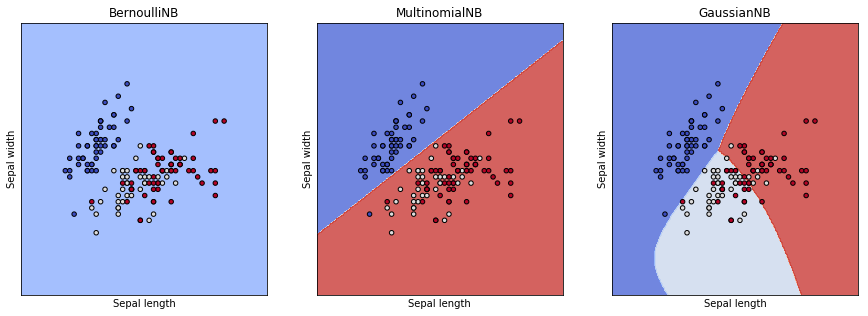

In [13]:
# Plotting decision boundaries
fig, sub = plt.subplots(1, 3,figsize=(15,5))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(build_model(), titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()